En la lección de hoy aprenderemos algunos conceptos nuevos y algo más complejos pero que serán importantes en nuestra carrera como analistas de datos. Estos conceptos son: 

- Tablas de contingencia

- Coeficiente de correlación

- Sesgos

- Intervalos de confianza

In [2]:
## como siempre lo primero que haremos será importar las librerías y los datos que necesitamos para desarrollar esta clase: 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from pydataset import data


Para este jupyter seguiremos utilizandoel *dataset* que nos descargaremos ayer de `pydataset. Recordemos que información teníamos en este dataset: 

- `state`: un código numérico que identifica el país. 

- `year`: el año en el que se recopilo la información (desde el 63 al 92). 

- `price`: el precio del paquete de cigarrillos. 

- `pop`: la población que había en ese momento

- `pop 16`: la población con más de 16 años. 

- `cpi`: índice de precios al consumo

- `ndi`: renta per cápita

- `sales`: las ventas de paquetes de cigarillos per cápita

- `pimin`: precio mínimo en los estados limítrofes por paquete de cigarrillos

In [3]:
# cargamos el dataset usando la librería pydataset. 

df_cigar = data("Cigar")
df_cigar.head()

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
1,1,63,28.6,3383.0,2236.5,30.6,1558.304530,93.9,26.1
2,1,64,29.8,3431.0,2276.7,31.0,1684.073202,95.4,27.5
3,1,65,29.8,3486.0,2327.5,31.5,1809.841875,98.5,28.9
4,1,66,31.5,3524.0,2369.7,32.4,1915.160357,96.4,29.5
5,1,67,31.6,3533.0,2393.7,33.4,2023.546368,95.5,29.6


# Tablas de contingencia

Cuando estamos trabajando con más de una variable, además de visualizar cada una de ellas individualmente mediante el uso de histogramas, podríamos querer analizar la relación que existe entre dos de esas variables. Las tablas de contingencia tienen esa utilidad, relacionando variables normalmente cualitativas o categóricas. Una tabla de frecuencias deberá contener al menos dos filas y dos columnas para representar datos categóricos en términos de conteos de frecuencia.

> Es decir, es el resultado de contar todas las combinaciones posibles de cada pareja de valores de las columnas que estamos intentando comprar. 

Veámoslo con un ejemplo de base de datos en el que tenemos una variable que representa el género de las personas y otra variable que representa si son diestras o zurdas. Se ha observado esta pareja de variables en una muestra de 100 personas:

| --- | Diestro | Zurdo | Total |  
| --- | --- | --- | --- |  
| Hombre | 43 | 9 | 52 |  
| Mujer | 44 | 4 | 48 |  
| Total | 87 | 13 | 100 |  

En la tabla anterior las filas y columnas delimitan las celdas donde se vuelcan las frecuencias de cada combinación de las dos variables analizadas. Adicionalmente, las cifras en la columna de la derecha y en la fila inferior (los totales) reciben el nombre de frecuencias marginales y la cifra situada en la esquina inferior derecha es el gran total.

**Objetivos de una tabla de contingencia**

Como hemos mencionado, la tabla de contingencia permite medir la interacción entre las dos variables para así poder comprender con mayor claridad los datos. Concretamente permite: 

- Ordenar la información recolectada para un estudio posterior.

- Analizar si existe una relación entre las dos variables cualitativas.

Las tablas de contingencia necesitan normalmente variables categóricas ya que para el análisis posterior se debe poder dividir cada una en grupos mutuamente excluyentes. El género y la mano dominante son ejemplos de este tipo de variables categóricas y excluyentes.


Como hemos dicho este tipo de tablas va a operar sobre variables categóricas, y nosotras no tenemos ninguna en nuestro dataset, asique haciendo uso de la función que creamos ayer convertiremos dos columnas numéricas en categóricas 👇🏽

In [4]:
# definimos la función
def cambiar_poblacion(col):
    if col <= 10000:
        return "baja"
    elif col > 10000 and col <= 20000:
        return "media"
    else:
        return "alta"


# aplicamos la función a nuestra columna
df_cigar["pop_cat"] = df_cigar["pop"].apply(cambiar_poblacion)

# aplicamos la función a nuestra columna
df_cigar["pop16_cat"] = df_cigar["pop16"].apply(cambiar_poblacion)

In [5]:
print("En la columna pop_cat tenemos")
print(df_cigar["pop_cat"].value_counts())

print("--------------------------------")
print("En la columna pop16_cat tenemos")
print(df_cigar["pop16_cat"].value_counts())

En la columna pop_cat tenemos
baja     1188
media     170
alta       22
Name: pop_cat, dtype: int64
--------------------------------
En la columna pop16_cat tenemos
baja     1303
media      68
alta        9
Name: pop16_cat, dtype: int64


In [7]:

#Usamos el método de pandas crosstab para generar la tabla de contingencia.
df_cigar_crosstab = pd.crosstab(df_cigar['pop_cat'], 
                            df_cigar['pop16_cat'], margins=True) 
df_cigar_crosstab

pop16_cat,alta,baja,media,All
pop_cat,,,,
alta,9,0,13,22
baja,0,1188,0,1188
media,0,115,55,170
All,9,1303,68,1380


En el código encima de este texto hemos usado el método `.crosstab()` de Pandas para representar la tabla de contingencia que relaciona la longitud y la anchura de los sépalos. Esta tabla de contingencia no es estrictamente la relación de dos variables categóricas, ya que `sepal_width` y `sepal_length` son variables numéricas continuas. Sin embargo, de cara a que nos sirvan para poder realizar la tabla de contingencia hemos agrupado las variables en categorías (rangos) de valores, que sí serán excluyentes entre sí.

Los resultados de la tabla nos muestran como ambas variables están relacionadas ya que los datos se agrupan en zonas muy concretas de la tabla. Es decir, hay valores de la número de poblacion menor que 16 que aparecen junto con valores de poblacion menor de 16.

El método `.crosstab()` acepta otros argumentos como `margins` que nos permite visualizar los subtotales por fila y columna, o `normalize` que normaliza los datos por filas, columnas, o sobre ambas, mostrando valores entre `0` y `1` en vez de frecuencias absolutas.

## Coeficiente de correlación de Pearson

La tabla de contingencia era para variables cualitativas, el coeficiente de correlación hace lo mismo para variables continuas cuantitativas (o variables numéricas).

El coeficiente de correlación, al igual que la tabla de contingencia, nos sirve para conocer la relación entre dos variables. Sin embargo, mientras que la tabla se usaba para relacionar variables caulitativas o categóricas, el coeficiente de correlación nos permite hacer una tarea similar con variables cuantitativas continuas. Ejemplos de este tipo de variables serían el peso y la altura de una persona. 

El coeficiente de correlación nos permite conocer la intensidad y dirección de la relación entre las dos variables. Es decir, podemos estimar como variará una de ellas cuando la otra cambie en una dirección u otra, si lo hará de manera directamente proporcional, inversamente, o sin ninguna correlación.

### ¿Cómo se interpreta el coeficiente?

El coeficiente de correlación de Pearson puede tomar valores entre -1 y 1, teniendo distinto significado según su valor:

- Si el coeficiente es mayor que 0, la correlación es positiva (según aumente el valor de una variable aumenta el valor de la otra). 

- Si el coeficiente es menor que 0, la correlación es negativa (según aumente el valor de una variable disminuye el valor de la otra). 

- Si el coeficiente de correlación de Pearson es igual a 1 o a -1, podemos considerar que la correlación que existe entre las variables es total (positiva o negativa).

- Por último, un valor del coeficiente igual a 0 nos indica que no existe relación lineal entre las dos variables, pero puede haber algún otro tipo de relación que no se capture bien con este coeficiente.

Para afirmar si un valor es alto o bajo, debemos comparar nuestros datos con otras investigaciones con las mismas variables y en circunstancias parecidas. Para representar las relaciones de diferentes variables que combinan linealmente, podemos utilizar la llamada matriz de varianzas-covarianzas o la matriz de correlaciones; en la diagonal de la primera nos encontraremos con valores de la varianza, y en la de la segunda nos encontraremos con unos (la correlación de una variable consigo misma es perfecta, =1).

### ¿Cómo calculamos el coeficiente usando Python?

El coeficiente de correlacion de Pearson puede calcularse en Pandas usando el método `.corr()`:

In [8]:
# calculamos la matriz de correlación de todas las variables numéricas de nuestro df
matriz_correlacion = df_cigar.corr()
matriz_correlacion

/tmp/ipykernel_2284/2293804491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_cigar.corr()


,state,year,price,pop,pop16,cpi,ndi,sales,pimin
state,1.000000e+00,-1.325410e-14,-0.009617,-0.093681,-0.096155,4.201830e-16,-0.035532,-0.103566,-0.000078
year,-1.325410e-14,1.000000e+00,0.918218,0.082145,0.117880,9.794833e-01,0.935570,-0.181901,0.920296
price,-9.616899e-03,9.182177e-01,1.000000,0.107727,0.137026,9.491390e-01,0.944311,-0.311258,0.987050
pop,-9.368120e-02,8.214504e-02,0.107727,1.000000,0.997799,8.153477e-02,0.158933,-0.111541,0.077434
pop16,-9.615511e-02,1.178804e-01,0.137026,0.997799,1.000000,1.152144e-01,0.193687,-0.111596,0.106264
cpi,4.201830e-16,9.794833e-01,0.949139,0.081535,0.115214,1.000000e+00,0.953297,-0.210231,0.952759
ndi,-3.553248e-02,9.355700e-01,0.944311,0.158933,0.193687,9.532968e-01,1.000000,-0.183839,0.937812
sales,-1.035661e-01,-1.819010e-01,-0.311258,-0.111541,-0.111596,-2.102311e-01,-0.183839,1.000000,-0.277258
pimin,-7.837030e-05,9.202965e-01,0.987050,0.077434,0.106264,9.527587e-01,0.937812,-0.277258,1.000000


El método `.corr()` devolverá como resultado una matriz cuadrada, de `N`x`N`, en la que la posición `i,j` indica el coeficiente de correlación entre la variable aleatoria `i` y la variable `j`. La matriz será simétrica respecto a la diagonal, y la propia diagonal será todo unos (`1`) ya que indica la correlación entre cada variable y ella misma. 

En el ejemplo anterior `N = 9`, por lo que la matriz resultado sera de 9 filas y 9 columnas, donde la diagonal es `1`, y las "esquinas" de la matriz indican la correlación entre las dos variables indicadas (longitud y anchura de los sepalos). 


Ver esta martiz puede resultar un poco tedioso interpretarlas, por lo que en estos casos haremos uso de las gráficas de tipo `heatmap()`. Veamos como hacerlo, para lo que necesitaremos importar seaborn. 

/tmp/ipykernel_2284/263838716.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cigar.corr(), # lo que queremos visualizar


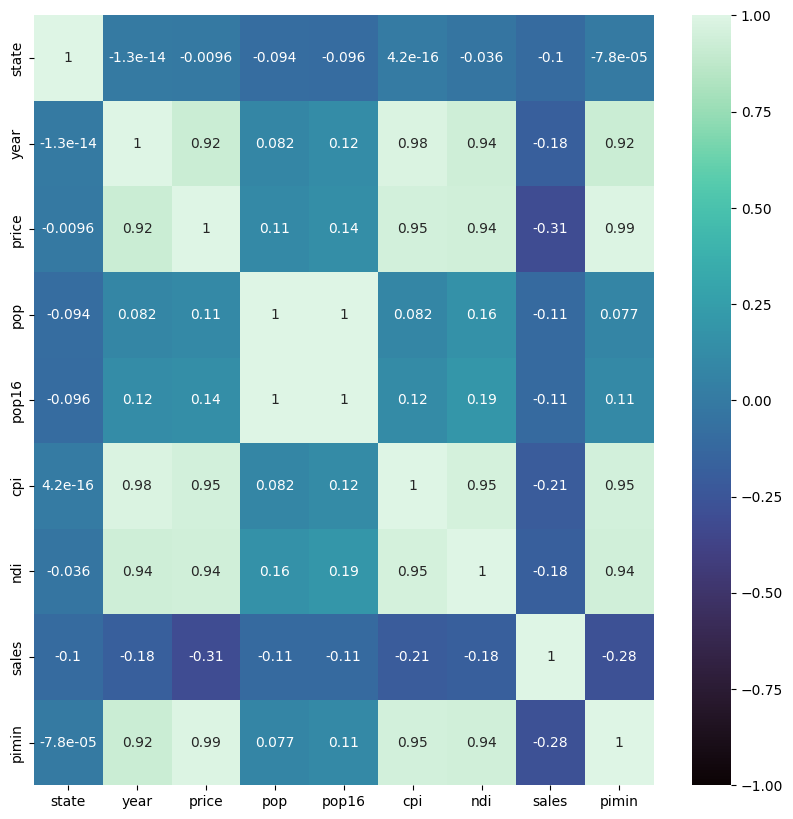

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# establecemos el tamaño de la gráfica
plt.figure(figsize = (10,10))

# creamos la gráfica
sns.heatmap(df_cigar.corr(), # lo que queremos visualizar
            cmap = "mako", # color del gráfico
            annot = True, # para que nos aparezcan los valores de la correlacion
            vmin = -1, # establecemos el valor mínimo de la escala de color
            vmax = 1 # establecemos el valor máximo de la escala de color
);

Ahora ya podemos ver los valores de una forma más amigable, y veremos que los cuadrados con los colores mas ocuros o más claros son aquellos que tienen una correlación mayor, mientras que los azules intermedios indican un correlación menor. 

Hagamos una pequeña interpretación más detallada de estos valores: 

-  En el caso de `pimin` con `year` vemos que tenemos un valor de 0.92. El `pimin` representaba el precio mínimo de la cajetilla de tabaco en cada estado. Al ser un valor positivo y relativamente cerca de 1, podemos decir que tienen una correlación fuerte y positiva. Es decir. según avanzaban los años el precio mínimo de la cajetilla aumentaba, lo cual tiene sentido. 

- Tambien tenemos casos donde la relación es baja, como `pop` y `cpi`, las cuales representaban la población y el indice de precios al consumo respectivamente. Esta relación toma un valor de 0.082, es decir, no hay ninguna relación entre ellas porque esta cerca de 0. 

Ahora nos puede surgir la duda de que es una correlación fuerte o no. Existe bastante consenso a la hora de interpretar los valores del coeficiente de correlación de Pearson utilizando los siguientes criterios (y considerando los valores absolutos): 

- 0 Nula

- 0   – 0.2 Muy baja

- 0.2 – 0.4 Baja

- 0.4 – 0.6 Moderada

- 0.6 – 0.8 Alta

- 0.8 – <1 Muy alta

- 1 Perfecta

**Ejercicio:** ¿Que nos indica el coeficiente de Pearson del ejemplo anterior acerca de la correlación entre la anchura y la longitud de los sépalos?

**Ejercicio:** Calcula el coeficiente de correlación de Pearson entre la longitud y anchura de los pétalos (usando el `iris` dataset). ¿Qué significa el valor obtenido?

**Ejercicio:** Calcula el coeficiente de correlación de Pearson entre la longitud de los pétalos y de los sépalos (usando el `iris` dataset). ¿Qué significa el valor obtenido?

**Ejercicio:** Calcula el coeficiente de correlación de Pearson entre todas las variables cuantitativas del `iris` dataset. ¿Ves alguna correlación interesante?

In [10]:
df_iris = pd.read_csv('../Visualizacion/iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df_iris.corr()

/tmp/ipykernel_2284/110869285.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_iris.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


/tmp/ipykernel_2284/1572131961.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(), # lo que queremos visualizar


<AxesSubplot:>

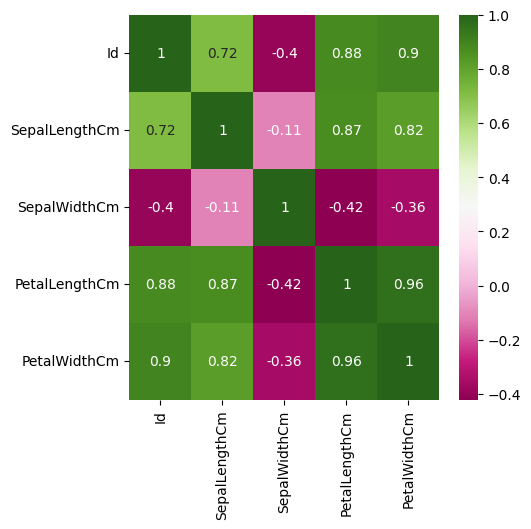

In [17]:
plt.figure(figsize = (5,5))

# creamos la gráfica
sns.heatmap(df_iris.corr(), # lo que queremos visualizar
            cmap = "PiYG", # color del gráfico
            annot = True) # para que nos aparezcan los valores de la correlacion
            # establecemos el valor máximo de la escala de color

## Sesgos (skewness) en las distribuciones de datos

En estadística, el *skewness* o sesgo es una medida de la asimetría de la distribución de los valores de una variable alrededor de su valor medio. Es decir, nos da una idea de cómo están distribuidos los valores de esa variable, añdiendo información sobre que la que obtenemos con la media, la varianza o la mediana. Un conjunto de datos será simétrico si su distribución de valores (el histograma) es igual a la izquierda que a la derecha de su punto central (la media)

Para ver esto podremos usar un histograma (en matplotlib usaremos el método `.hist()` y en seaborn usaremos el método `.distplot()`. Veamos un ejemplo con el precio:

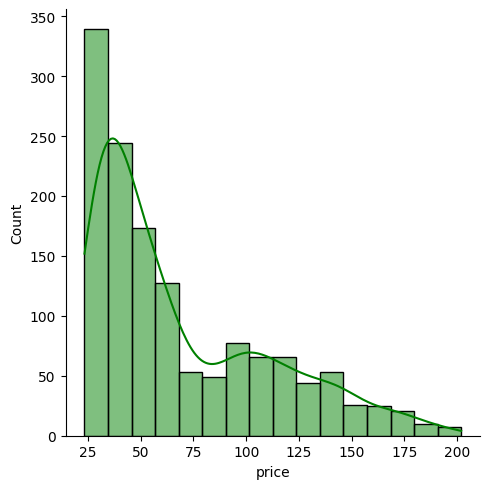

In [18]:
# en este caso vamos a usar el método de seaborn 

sns.displot(df_cigar["price"], # sobre que columna queremos hacer la gráfica
            color = "green", # que color le queremos poner a la gráfica
            kde = True);# para que nos visualice la línea de tendencia

Ahora lo hemos visto analíticamente y podemos ver claramente que no es simétrica (si lo fuera veríamos una Campana de Gauss perfecta), pero puede podemos calcular el sesgo de una variale usando el método `skew` de la librería `scipy`. Veamos como hacerlo:

In [19]:
# aplicamos el método skew para saber si esta o no sesgada nuestra variable
skewness = skew(df_cigar['price'])
print(f"El valor del sesgo para la variable price es: {skewness}")

El valor del sesgo para la variable price es: 1.0453508709449968


El *skewness* nos estará indicando la forma que tiene dicho histograma. El valor que puede tomar el *skewness* será positivo, cero o negativo, teniendo un significado diferente en cada caso:

- Positivo: la "cola" derecha del histograma será más larga que la izquierda. A este tipo de distribución de los valores se le llama "sesgado a la derecha" (*right-skewed*, *right-tailed*).

- Negativo: la "cola" izquierda del histograma será más larga que la derecha. A este tipo de distribución de los valores se le llama "sesgado a la izquierda" (*left-skewed*,  *left-tailed*).

- Cero: un *skewness* igual a 0 nos indica que la distribución de los valores es simétrica respecto a la media.

En el histograma anterior, podemos ver cómo los valores están claramente concentrados en la parte izquierda del mismo y tenemos una "cola" hacia la parte derecha de los valores, además hemos obtenido un valor de *skew* mayor que 1, por lo tanto nuestra variable esta sesgada a la derecha. 

## Intervalos de confianza

En estadística, se llama intervalo de confianza al par de números entre los cuáles se estima que estará cierto valor de una variable con un determinado nivel de confianza. Veamos un ejemplo directamente para entender mejor este concepto. 

Imaginemos que queremos saber la media de la altura de las personas que hay en el mundo. Pero … ¡¡Tendríamos que medir a cada una de las personas que ahora mismo hay en el planeta... es una auténtica locura!! ¿No sería mejor coger un grupito pequeño al azar de 100 personas (muestra) y calcular la media de este grupito?. Después podemos poner un margen de error o lo que es lo mismo, un **Intervalo de Confianza** (IC). Por lo tanto, calcular un intervalo de confianza es una técnica esencial en procesos estadísticos, pues nos permite estimar un resultado a partir de una media muestral (las 100 personas a las que medimos), reduciendo los esfuerzos que requeriría el proceso en caso de tomar la muestra total (medir a todas las personas del mundo). Si bien es cierto que seguiríamos sin saber el verdadero valor poblacional, podríamos suponer que este se va a situar cerca del valor muestral. A esa media le sumamos el margen de error y tenemos un valor del intervalo de confianza. Por otro lado, le restamos a la media ese margen de error y tendremos otro valor. Entre esos dos valores estará la media poblacional.

> En conclusión, el intervalo de confianza no sirve para dar una estimación puntual del parámetro poblacional, si nos va a servir para hacernos una idea aproximada de cuál podría ser el verdadero de este. Nos permite acotar entre dos valores en dónde se encontrará la media de la población.


**Factores de los que depende un intervalo de confianza**

El cálculo de un intervalo de confianza depende principalmente de los siguientes factores:

- **Tamaño de la muestra seleccionada**: dependiendo de la cantidad de datos que se hayan utilizado para calcular el valor muestral, este se acercará más o menos al verdadero parámetro poblacional. En nuestro ejemplo este valor es de 100.

- **Nivel de confianza**: nos va a informar en qué porcentaje de casos nuestra estimación acierta. Los niveles habituales son el 95% y el 99%.

- **Margen de error de nuestra estimación**: este se denomina como alfa y nos informa de la probabilidad que existe de que el valor poblacional (este sería toda las personas del mundo) esté fuera de nuestro intervalo.

-  **Lo estimado en la muestra** (media, varianza, diferencia de medias…): de esto va a depender el estadístico pivote para el cálculo del intervalo.


Bansandonos en el ejemplo de las alturas que estabamos viendo hasta ahora, ¿cómo calculamos el intervalo de confianza? 

1. Elegimos un tamaño muestral, en nuestro caso será 100

2. Calculamos la media y la desviación estándar de nuestra muestra. Estos estadísticos los aprendimos en la primera lección de estadística y recordad que teníamos métodos de pandas que nos permitían calcularlos facilmente. En nuestro caso supongamos que tenemos una media de 1.77 y una desviacion estándar de 0.2. 

3. Elegir un nivel de confianza, como dijimos arriba, los niveles de confianza mas usados son 90%, 95% y 99%. Supongamos que nosotras elegimos el 95%. 

4. Calcular el margen de error, el cual viene definido por la siguiente fórmula: 

    Za/2 * σ/√(n)

    Donde: 
    - `a`el nivel de confiaza 
    - `σ` la desviación estándar
    - `n`el tamaño muestral

    Una vez que tengamos esto ya nos pondremos manos a la obra. Para seguir con los pasos para calcular tendremos que usar la tabla de z, que tenemos a continuación

    METER TABLA DE Z

    - 4.1 Convertimos el nivel de confianza a decimal (en este caso será 0.95) y lo divididmos entre 2- Esto nos dará un valor de 0.475. Basandonos en el valor obtenido buscaremos en la tabla de z(la que tenemos arriba) para sacar el valor de la `z`. ¿Cómo lo haremos? 
        - En las filas buscaremos el valor 0.4, por nuestro primer decimal. 
        - En las columnas buscaremos el valor 0.07, por nuestro segundo decimal. 

        Como si estuvieramos jugando a hundir la flota sacaremos el valor de la `z`. En nuestro caso es de 0.68. 

    - 4.2 Toma el valor de la desviación estándar y calculamos su raíz cuadrada. En este caso √0.2 = 0.44 - 2.07, es decir, 

    - 4.3 Multiplicamos el valor que sacamos de la tabla de z por el valor obtenido en el paso anterior 0.68 * 0.44. Esto nos devolverá nuestro margen de error, que es de 0.30. 

    
5. Calcular el intervalo de confianza, para esto solo tenemos que tomar la media y sumarle y restarle el margen de error calculado en el paso previo. Esto nos devolerá el intervalo de confianza. En nuestro caso nuestro intervalode confiaza irá de 1.77 - 0.3 y 1.77 + 0.3. Nuesto intervalo de confianza será 1.47- 2.07

**¿Cómo interpretamos este resultado?**

Que hay un 95% de probabilidad de que la media real del precio se encuentre en el intervalo calculado.


Para el cálculo de un intervalo de confianza concreto es necesario conocer la distribución que seguirán los valores del parámetro o variable para el que estamos realizando la estimación. Normalmente, si no se conoce dicha distribución de antemano, se suele realizar la asunción que la variable seguirá una distribución normal (o gaussiana). Esta estimación suele ser bastante acertada en los casos en los que el tamaño de las muestras es lo suficientemente grande y no estamos mirando el resultado de multiples factores en conjunto.

En Python podemos calcular el intervalo de confianza usando la librería `Scipy`. Vemamos un ejemplo: 

In [20]:
import scipy.stats as st

# Queremos realizar el calculo de confianza para la media de la longitud de los sépalos
datos = df_cigar['price']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(datos))

(66.48276721448336, 70.9170878579804)
68.69992753623188


/tmp/ipykernel_2284/3589799637.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))


El anterior código nos indica que hay un 95% de probabilidad de que la media real del precio se encuentre en el intervalo calculado. Los parámetros `loc` y `scale` sirven para indicar los parámetros de la distribución normal que suponemos que siguen los datos indicados en `df`. En `loc` debemos indicar la media y en `scale` la desviación estándar. `alpha` será el porcentaje de confianza para el que queremos calcular el intervalo.

¿Qué pasaría si eligieramos la alpha más alta? Veamoslo con un ejemplo: 



In [21]:
# Queremos realizar el calculo de confianza para la media de la longitud de los sépalos
datos = df_cigar['price']

# Utilizamos Scipy para calcular el intervalo de confianza del 99% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 99 de probabilidad.
print(st.t.interval(alpha=0.99, df=len(datos)-1, loc=np.mean(datos)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(datos))

(66.12052828298506, 71.2793267894787)
68.69992753623188


/tmp/ipykernel_2284/3325263655.py:6: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.99, df=len(datos)-1, loc=np.mean(datos)))


Lo que nos esta diciendo este error, es que hay un 99% de probabilidad de que el precio de las cajas de cigarillos vaya entre 66.12 y 71.27 $. Si nos fijamos, este rango de valores es más amplio, lo cual si lo pensamos tiene sentido. 

**Ejercicio:** Calcula el intervalo de confianza al 80% para la longitud de los pétalos. ¿Qué ha cambiado? Hazlo de nuevo con una confianza del 99%. ¿Qué ha sucedido ahora?

In [23]:
df_iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [24]:
datos = df_iris['PetalLengthCm']
print(st.t.interval(alpha=0.80, df=len(datos)-1, loc=np.mean(datos)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(datos))

(2.4714075312650587, 5.045925802068274)
3.758666666666666


/tmp/ipykernel_2284/1658050167.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.80, df=len(datos)-1, loc=np.mean(datos)))


In [25]:
datos = df_iris['PetalLengthCm']
print(st.t.interval(alpha=0.99, df=len(datos)-1, loc=np.mean(datos)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(datos))

(1.1494387593344735, 6.367894573998859)
3.758666666666666


/tmp/ipykernel_2284/1169817482.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.99, df=len(datos)-1, loc=np.mean(datos)))
